In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_excel("/Users/gunhoro/Desktop/projects/epl/epl.xlsx")
df1.head()

,Team Name,2014 rank,2014 wins,2014 losses,2014 goal-scored,2015 rank,2015 wins,2015 losses,2015 goal-scored,2016 rank,...,2018Defend,2019Total,2019Offend,2019Defend,2017Goal,2017Scored,2018Goal,2018Scored,2019Goal,2019Scored
0,Liverpool,6,18,12,4,8,16,10,13,4,...,6,3,2,4,2,1,2,1,2,1
1,Man C,2,24,7,45,4,19,10,30,3,...,1,1,1,2,1,2,1,2,1,2
2,Man U,4,20,8,25,5,19,10,14,6,...,4,2,3,1,5,3,5,11,5,3
3,Chelsea,1,26,3,41,10,12,12,6,1,...,2,4,6,5,3,11,6,3,3,11
4,LC,14,11,19,-9,1,23,3,32,12,...,7,9,9,9,4,6,11,7,4,6


In [2]:
X=df1.iloc[:,1:9].values
X=(X-X.mean())/X.std()
Y=df1.iloc[:,9]
X

array([[-0.64646788,  0.40363223, -0.12141782, -0.82148456, -0.47145119,
         0.22861554, -0.29643451, -0.03390948],
       [-0.99650125,  0.92868228, -0.55895954,  2.76635746, -0.82148456,
         0.49114057, -0.29643451,  1.45373233],
       [-0.82148456,  0.57864891, -0.47145119,  1.01619062, -0.73397622,
         0.49114057, -0.29643451,  0.05359886],
       [-1.08400959,  1.10369896, -0.9089929 ,  2.4163241 , -0.29643451,
        -0.12141782, -0.12141782, -0.64646788],
       [ 0.05359886, -0.20892617,  0.49114057, -1.95909301, -1.08400959,
         0.84117394, -0.9089929 ,  1.62874902],
       [-0.73397622,  0.49114057, -0.12141782, -0.73397622, -0.9089929 ,
         0.49114057, -0.64646788,  4.95406602],
       [-0.9089929 ,  0.7536656 , -0.55895954,  1.89127404, -0.99650125,
         0.57864891, -0.55895954,  1.36622399],
       [-0.20892617, -0.12141782,  0.1411072 , -1.34653461, -0.20892617,
        -0.20892617, -0.03390948, -0.82148456],
       [-0.55895954,  0.40363223

In [3]:
import statsmodels.api as sm
from statsmodels.api import add_constant
X_sm=X=sm.add_constant(X)
model=sm.OLS(Y,X_sm)
model.fit().summary()

/Users/gunhoro/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              2016 rank   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     4.482
Date:                Fri, 28 Aug 2020   Prob (F-statistic):              0.351
Time:                        21:27:48   Log-Likelihood:                -8.6164
No. Observations:                  10   AIC:                             35.23
Df Residuals:                       1   BIC:                             37.96
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.7850     11.350      1.391      0.397    -128.435     160.005
x1            -9.4041     37.753     -0.249      0.845    -489.108     470.299
x2           -22.7587     34.939     -0.651      0.632    -466.702     421.185
x3             3.5404     15.276      0.232      0.855    -190.555     197.636
x4             4.3107      6.186      0.697      0.613     -74.288      82.909
x5            26.5894     46.276      0.575      0.668    -561.405     614.583
x6            13.9630     18.200      0.767      0.583    -217.294     245.220
x7           -17.7329     35.070     -0.506      0.702    -463.337     427.872
x8            -0.0636      1.349     -0.047      0.970     -17.208      17.081
==============================================================================
Omnibus:                        0.732   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.693   Jarque-Bera (JB):                0.381
Skew:                          -0.432   Prob(JB):                        0.826
Kurtosis:                       2.587   Cond. No.                         290.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score
lm=LinearRegression()
lm.fit(X_train,y_train)
cross_val_score(lm,X_train,y_train,scoring= 'neg_mean_squared_error',cv=3)

array([-32.69362578,  -3.19411479, -10.52288122])

In [5]:
tpred_lm = lm.predict(X_test)
X_test
tpred_lm

array([1.49655857, 0.42887754])

In [6]:
X_test

array([[ 1.        , -0.55895954,  0.40363223,  0.05359886,  0.66615725,
        -0.64646788,  0.40363223, -0.20892617,  0.40363223],
       [ 1.        , -0.99650125,  0.92868228, -0.55895954,  2.76635746,
        -0.82148456,  0.49114057, -0.29643451,  1.45373233]])

In [7]:
# Use random forest classifier to see if a team can make it to top 4
x1=df1.iloc[:,1].values
x1=np.append(x1,df1.iloc[:,5].values)
x1=np.append(x1,df1.iloc[:,9].values)
x1=np.append(x1,df1.iloc[:,13].values)
x2=df1.iloc[:,4].values
x2=np.append(x2,df1.iloc[:,8].values)
x2=np.append(x2,df1.iloc[:,12].values)
x2=np.append(x2,df1.iloc[:,16].values)
x3=df1.iloc[:,5].values
x3=np.append(x3,df1.iloc[:,9].values)
x3=np.append(x3,df1.iloc[:,13].values)
x3=np.append(x3,df1.iloc[:,17].values)
x4=df1.iloc[:,8].values
x4=np.append(x4,df1.iloc[:,12].values)
x4=np.append(x4,df1.iloc[:,16].values)
x4=np.append(x4,df1.iloc[:,20].values)



In [8]:
y1=df1.iloc[:,9].values
y1=np.append(y1,df1.iloc[:,13].values)
y1=np.append(y1,df1.iloc[:,17].values)
y1=np.append(y1,df1.iloc[:,21].values)
y1[np.where(y1<=4)]=0
y1[np.where(y1>4)]=1
y1

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [9]:
dataset = pd.DataFrame({'year1rank': x1, 
                        'year1goal': x2,'year2rank': x3, 'year2goal': x4,'Top4?' : y1})
X=dataset.iloc[:,0:4]
y=dataset.iloc[:,4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
model.score(X_test, y_test)


1.0

In [12]:
y_predicted = model.predict(X_test)


In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[2, 0],
       [0, 6]])

Text(69.0, 0.5, 'Truth')

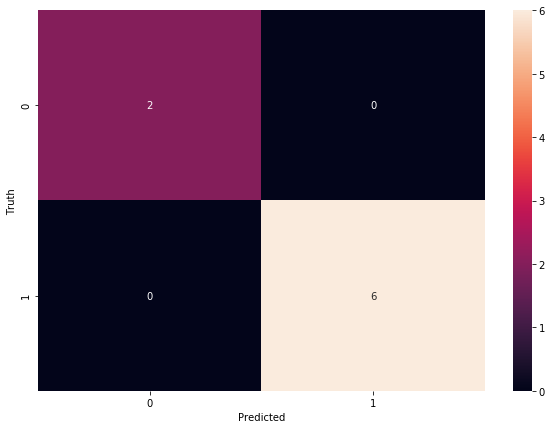

In [14]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
X_test

,year1rank,year1goal,year2rank,year2goal
19,7,14,11,-17
16,2,29,5,33
15,3,70,2,60
26,5,33,6,23
4,14,-9,1,32
12,5,14,6,25
37,8,-14,8,8
27,7,18,8,-14


In [16]:
y_predicted

array([1, 1, 0, 1, 1, 0, 1, 1])

In [17]:
X

,year1rank,year1goal,year2rank,year2goal
0,6,4,8,13
1,2,45,4,30
2,4,25,5,14
3,1,41,10,6
4,14,-9,1,32
5,5,5,3,70
6,3,35,2,29
7,11,-2,11,4
8,7,21,6,18
9,12,-3,7,14


In [18]:
futurex1=df1.iloc[:,17].values
futurex2=df1.iloc[:,20].values
futurex3=df1.iloc[:,21].values
futurex4=df1.iloc[:,24].values

In [19]:
predictfuturex = pd.DataFrame({'year1rank': futurex1, 
                        'year1goal': futurex2,'year2rank': futurex3, 'year2goal': futurex4})

In [20]:
model.predict(predictfuturex)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [21]:
# Want to find the relationship between number of goals a team scored and the average salary of offense the team invested in
offender=df1['2017Offend'].values
offender=np.append(offender,df1['2018Offend'].values)
offender=np.append(offender,df1['2019Offend'].values)
goals=df1['2017Goal'].values
goals=np.append(goals,df1['2018Goal'].values)
goals=np.append(goals,df1['2019Goal'].values)
defender=df1['2017Defend'].values
defender=np.append(defender,df1['2018Defend'].values)
defender=np.append(defender,df1['2019Defend'].values)
scored=df1['2017Scored'].values
scored=np.append(scored,df1['2018Scored'].values)
scored=np.append(scored,df1['2019Scored'].values)

In [22]:
offender

array([ 5,  1,  3, 11,  7, 10,  2,  4,  8, 15,  3,  1,  2, 15, 10,  5,  4,
        9,  6,  7,  2,  1,  3,  6,  9,  8,  4,  7, 11, 14])

In [23]:
goals

array([ 2,  1,  5,  3,  4,  6,  7, 11,  9, 10,  2,  1,  5,  6, 11,  4,  3,
        8, 15,  9,  2,  1,  5,  3,  4,  6,  7, 11,  9, 10])

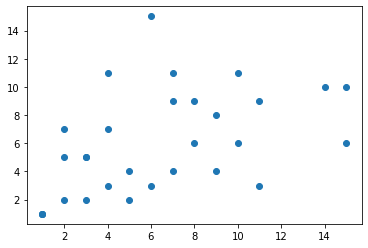

In [24]:
plt.scatter(offender,goals)

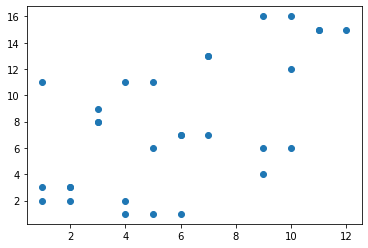

In [25]:
plt.scatter(defender,scored)

In [26]:
#all_things[['gunOwnership','killing/pop','Gini Coefficient','BlackPerc']].corr()
corr_df=X
corr_df['rank']=y
corr_df[['year1rank','year2rank','year1goal','year2goal','rank']].corr()

,year1rank,year2rank,year1goal,year2goal,rank
year1rank,1.000000,0.434223,-0.863134,-0.429900,0.556684
year2rank,0.434223,1.000000,-0.578560,-0.876225,0.435500
year1goal,-0.863134,-0.578560,1.000000,0.580813,-0.578376
year2goal,-0.429900,-0.876225,0.580813,1.000000,-0.578678
rank,0.556684,0.435500,-0.578376,-0.578678,1.000000


In [27]:
invest_rank=df1[['Team Name','2017Total','2017 rank','2018Total','2018 rank','2019Total','2019 rank',]]
invest_rank['2017dif']=df1['2017Total']-df1['2017 rank']
invest_rank['2018dif']=df1['2018Total']-df1['2018 rank']
invest_rank['2019dif']=df1['2019Total']-df1['2019 rank']
invest_rank

/Users/gunhoro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/gunhoro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gunhoro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Team Name,2017Total,2017 rank,2018Total,2018 rank,2019Total,2019 rank,2017dif,2018dif,2019dif
0,Liverpool,5,4,5,2,3,1,1,3,2
1,Man C,2,1,2,1,1,2,1,1,-1
2,Man U,1,2,1,6,2,3,-1,-5,-1
3,Chelsea,4,5,3,3,4,4,-1,0,0
4,LC,11,9,9,9,9,5,2,0,4
5,Tottenham,7,3,6,4,6,6,4,2,0
6,Arsenal,3,6,4,5,5,8,-3,-1,-3
7,Everton,6,8,7,8,7,12,-2,-1,-5
8,Southampton,10,17,10,16,11,11,-7,-6,0
9,Westham,8,13,8,10,10,16,-5,-2,-6


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [29]:
df2=pd.read_excel("/Users/gunhoro/Desktop/projects/epl/2020data.xlsx",skiprows=[0])
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.71428571 1.         0.57142857 0.66666667 0.8       ]
0.7504761904761905


In [30]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())


[0.71428571 0.85714286 0.85714286 0.66666667 0.4       ]
0.6990476190476189


/Users/gunhoro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gunhoro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gunhoro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gunhoro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gunhoro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

In [31]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.71428571 0.57142857 0.42857143 0.16666667 0.8       ]
0.5361904761904762


In [32]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.57142857 0.71428571 0.71428571 0.5        0.6       ]
0.62


In [33]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

/Users/gunhoro/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gunhoro/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gunhoro/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gunhoro/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gunhoro/anaconda3/lib/python3

[0.71428571 0.42857143 0.57142857 0.33333333 0.8       ]
0.5695238095238094


In [34]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.57142857 0.57142857 0.57142857 0.5        0.6       ]
0.562857142857143


/Users/gunhoro/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/gunhoro/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/gunhoro/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/gunhoro/anaconda3/lib/python3.7/site-packa

In [35]:
df2.rename(columns={'Unnamed: 0':'Game'},inplace=True)
df2.head()

,Game,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
0,1,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
1,2,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
2,3,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
3,4,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
4,5,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,...,19,4,1,0,1.95,3.6,3.60,0.230769,0.375000,Sat


In [36]:
tot=df2[df2['teamId']=='Tottenham']
tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 13 to 569
Data columns (total 45 columns):
Game            29 non-null int64
h_a             29 non-null object
xG              29 non-null float64
xGA             29 non-null float64
npxG            29 non-null float64
npxGA           29 non-null float64
deep            29 non-null int64
deep_allowed    29 non-null int64
scored          29 non-null int64
missed          29 non-null int64
xpts            29 non-null float64
result          29 non-null object
date            29 non-null object
wins            29 non-null int64
draws           29 non-null int64
loses           29 non-null int64
pts             29 non-null int64
npxGD           29 non-null float64
teamId          29 non-null object
ppda_cal        29 non-null float64
allowed_ppda    29 non-null float64
matchtime       29 non-null int64
tot_points      29 non-null int64
round           29 non-null int64
tot_goal        29 non-null int64
tot_con         29 non-nu

In [37]:
tot.describe()
tot.drop(['npxG','npxGA','npxGD','round','Referee.x'],axis=1)

,Game,h_a,xG,xGA,deep,deep_allowed,scored,missed,xpts,result,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
13,14,h,2.572620,0.639599,15,2,3,1,2.5933,w,...,9,0,0,0,1.30,5.25,10.00,0.225806,0.571429,Sat
33,34,a,0.074542,3.200760,2,10,2,2,0.0376,d,...,4,2,0,0,1.36,5.25,8.00,0.333333,0.666667,Sat
58,59,h,1.259270,0.514280,8,5,0,1,2.0469,l,...,5,6,2,0,1.20,6.50,14.00,0.117647,0.375000,Sun
79,80,a,1.955140,1.925090,6,12,2,2,1.4545,d,...,19,6,5,0,2.37,3.60,2.80,0.307692,0.692308,Sun
90,91,h,1.049440,0.577323,8,5,4,0,1.7965,w,...,11,3,2,0,1.36,5.25,8.00,0.384615,0.545455,Sat
103,104,a,1.337350,1.287520,9,7,1,2,1.4105,l,...,13,2,2,0,2.87,3.50,2.37,0.437500,0.363636,Sat
130,131,h,1.190080,1.162560,7,8,2,1,1.3805,w,...,16,6,2,0,1.40,4.75,8.00,0.444444,0.428571,Sat
141,142,a,0.478504,2.600170,4,12,0,3,0.1078,l,...,7,4,1,0,3.90,3.60,1.90,0.352941,0.375000,Sat
171,172,h,0.891617,0.846851,10,2,1,1,1.3988,d,...,9,2,3,0,1.40,5.00,7.50,0.166667,0.285714,Sat
199,200,a,1.351430,2.188510,4,13,1,2,0.7543,l,...,11,3,3,0,1.50,4.33,6.50,0.619048,0.363636,Sun


In [38]:
pd.pivot_table(tot, index = 'h_a', values = ['wins','draws','loses','pts','xG','xGA','deep','deep_allowed','ppda_cal'])

,deep,deep_allowed,draws,loses,ppda_cal,pts,wins,xG,xGA
h_a,,,,,,,,,
a,5.533333,7.533333,0.400000,0.400000,13.649179,1.000000,0.200000,1.273891,1.747607
h,7.142857,7.142857,0.142857,0.285714,12.537841,1.857143,0.571429,1.463216,1.314862


In [39]:
pd.pivot_table(tot, index = 'wins', values = ['xG','xGA','deep','deep_allowed','ppda_cal'])

,deep,deep_allowed,ppda_cal,xG,xGA
wins,,,,,
0,5.500000,7.500000,13.875594,1.040372,1.737074
1,7.636364,7.090909,11.864252,1.896972,1.214077


In [40]:
pd.pivot_table(df2, index = 'h_a', values = ['wins','draws','loses','pts','xG','xGA','deep','deep_allowed','ppda_cal'])

,deep,deep_allowed,draws,loses,ppda_cal,pts,wins,xG,xGA
h_a,,,,,,,,,
a,6.027778,7.218750,0.25,0.447917,12.672025,1.15625,0.302083,1.336800,1.583376
h,7.218750,6.027778,0.25,0.302083,11.932908,1.59375,0.447917,1.583376,1.336800


In [41]:
pd.pivot_table(df2, index = 'wins', values = ['xG','xGA','deep','deep_allowed','ppda_cal'])

,deep,deep_allowed,ppda_cal,xG,xGA
wins,,,,,
0,5.786111,7.200000,13.048590,1.139597,1.717949
1,8.018519,5.662037,11.058928,1.994241,1.030321


In [42]:
pd.pivot_table(tot, index = 'matchDay', values = ['xG','xGA','deep','deep_allowed','ppda_cal'])

,deep,deep_allowed,ppda_cal,xG,xGA
matchDay,,,,,
Sat,6.687500,6.875000,14.252645,1.421085,1.471000
Sun,6.222222,9.444444,13.127957,1.331825,1.731404
Thu,7.000000,2.000000,10.125000,1.026450,1.090070
Wed,4.333333,5.333333,7.982841,1.281045,1.471157


In [46]:
tot[['xG','xGA','deep','deep_allowed','ppda_cal','wins','scored']].corr()

,xG,xGA,deep,deep_allowed,ppda_cal,wins,scored
xG,1.000000,-0.292922,0.455343,-0.181069,-0.340243,0.477698,0.531365
xGA,-0.292922,1.000000,-0.358148,0.482676,0.485816,-0.302710,-0.268812
deep,0.455343,-0.358148,1.000000,-0.138536,-0.364369,0.299151,0.123372
deep_allowed,-0.181069,0.482676,-0.138536,1.000000,0.556909,-0.039989,-0.280526
ppda_cal,-0.340243,0.485816,-0.364369,0.556909,1.000000,-0.099859,-0.079142
wins,0.477698,-0.302710,0.299151,-0.039989,-0.099859,1.000000,0.752938
scored,0.531365,-0.268812,0.123372,-0.280526,-0.079142,0.752938,1.000000


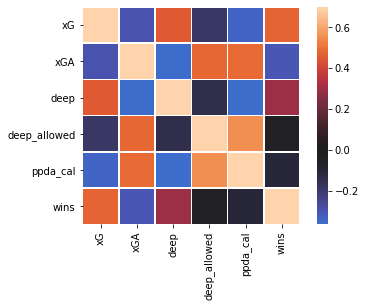

In [45]:
sns.heatmap(tot[['xG','xGA','deep','deep_allowed','ppda_cal','wins']].corr(),vmax=0.7, center=0,square=True, linewidths=0.5)

In [49]:
#Find characteristics of teams that tottenham lost to 
tot_1=tot[tot['result']=='l']
tot_1

,Game,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
58,59,h,1.259270,0.51428,1.259270,0.514280,8,5,0,1,...,5,6,2,0,1.20,6.50,14.00,0.117647,0.375000,Sun
103,104,a,1.337350,1.28752,1.337350,1.287520,9,7,1,2,...,13,2,2,0,2.87,3.50,2.37,0.437500,0.363636,Sat
141,142,a,0.478504,2.60017,0.478504,2.600170,4,12,0,3,...,7,4,1,0,3.90,3.60,1.90,0.352941,0.375000,Sat
199,200,a,1.351430,2.18851,1.351430,1.427340,4,13,1,2,...,11,3,3,0,1.50,4.33,6.50,0.619048,0.363636,Sun
290,291,a,0.542315,1.47683,0.542315,0.715699,2,1,1,2,...,9,3,1,0,2.75,3.40,2.55,0.583333,0.625000,Wed
357,358,h,0.276667,1.49374,0.276667,0.732575,7,8,0,2,...,11,5,3,0,2.37,3.75,2.75,0.200000,0.230769,Sun
405,406,a,1.078000,1.51192,1.078000,1.511920,4,4,0,1,...,8,9,4,0,3.30,3.50,2.10,0.250000,0.454545,Wed
433,434,h,1.105840,1.74564,1.105840,1.745640,4,21,0,1,...,8,3,2,0,4.50,4.33,1.66,0.285714,0.538462,Sat
521,522,a,0.265879,1.78193,0.265879,1.781930,1,5,1,2,...,14,5,2,0,1.72,4.00,4.50,0.411765,0.600000,Sat
554,555,h,1.630790,2.62251,1.630790,2.622510,5,2,2,3,...,14,5,2,0,2.45,3.20,3.00,0.384615,0.285714,Sun


In [51]:
df2

,Game,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
0,1,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,...,9,2,2,0,1.14,10.00,19.00,0.466667,0.416667,Fri
1,2,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,...,9,2,2,0,1.14,10.00,19.00,0.466667,0.416667,Fri
2,3,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,...,13,1,2,0,12.00,6.50,1.22,0.600000,0.642857,Sat
3,4,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,...,13,1,2,0,12.00,6.50,1.22,0.600000,0.642857,Sat
4,5,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,...,19,4,1,0,1.95,3.60,3.60,0.230769,0.375000,Sat
5,6,a,0.855516,0.670022,0.855516,0.670022,5,7,3,0,...,11,2,1,0,1.90,3.40,4.00,0.272727,0.600000,Sat
6,7,h,0.909241,1.087520,0.909241,1.087520,0,9,3,0,...,12,7,0,0,2.62,3.20,2.75,0.400000,0.272727,Sat
7,8,h,0.871590,1.224600,0.871590,1.224600,5,5,0,0,...,14,2,1,1,3.00,3.25,2.37,0.333333,0.300000,Sat
8,9,a,1.224600,0.871590,1.224600,0.871590,5,5,0,0,...,14,2,1,1,3.00,3.25,2.37,0.333333,0.300000,Sat
9,10,a,1.598640,1.340990,1.598640,1.340990,6,4,1,1,...,19,4,1,0,1.95,3.60,3.60,0.230769,0.375000,Sat


In [ ]:
df3=pd.read_excel("/Users/gunhoro/Desktop/projects/epl/season-1819_csv.xlsx",skiprows=[0])
totte=df3[df3['HomeTeam']=='Tottenham']
nham=df3[df3['AwayTeam']=='Tottenham']

In [ ]:
tottenham=pd.concat([totte,nham],axis=0)

In [90]:

df3['Win']=0
df3.Win[(df3['HomeTeam']=='Tottenham') & (df3['FTHG'] > df3['FTAG'])]=1
df3.Win[(df3['AwayTeam']=='Tottenham') & (df3['FTHG'] < df3['FTAG'])]=1
df3.Win[(df3['AwayTeam']=='Tottenham') & (df3['FTHG'] == df3['FTAG'])]=0
df3.Win[(df3['HomeTeam']=='Tottenham') & (df3['FTHG'] == df3['FTAG'])]=0
df3.Win[(df3['HomeTeam']=='Tottenham') & (df3['FTHG'] < df3['FTAG'])]=-1
df3.Win[(df3['AwayTeam']=='Tottenham') & (df3['FTHG'] > df3['FTAG'])]=-1
tottenham=df3[(df3['AwayTeam']=='Tottenham') |(df3['HomeTeam']=='Tottenham')]
tottenham

/Users/gunhoro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/gunhoro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gunhoro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Win
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89,1
14,E0,18/08/2018,Tottenham,Fulham,3,1,H,1,0,H,...,21,-1.75,2.06,2.00,1.91,1.86,1.27,6.50,11.96,1
29,E0,27/08/2018,Man United,Tottenham,0,3,A,0,0,D,...,20,-0.25,2.25,2.18,1.76,1.72,2.62,3.35,2.93,1
39,E0,02/09/2018,Watford,Tottenham,2,1,H,0,0,D,...,22,1.00,1.87,1.82,2.10,2.05,5.60,3.97,1.69,-1
45,E0,15/09/2018,Tottenham,Liverpool,1,2,A,0,1,A,...,23,0.25,1.90,1.85,2.07,2.01,3.14,3.57,2.37,-1
50,E0,22/09/2018,Brighton,Tottenham,1,2,A,0,1,A,...,23,1.00,1.68,1.63,2.42,2.33,5.52,3.99,1.70,1
63,E0,29/09/2018,Huddersfield,Tottenham,0,2,A,0,2,A,...,23,1.00,2.21,2.14,1.80,1.75,6.19,3.88,1.66,1
75,E0,06/10/2018,Tottenham,Cardiff,1,0,H,1,0,H,...,20,-2.00,2.22,2.12,1.84,1.75,1.25,6.60,12.33,1
86,E0,20/10/2018,West Ham,Tottenham,0,1,A,0,1,A,...,19,0.75,1.83,1.76,2.20,2.13,3.89,3.73,2.02,1
99,E0,29/10/2018,Tottenham,Man City,0,1,A,0,1,A,...,19,1.00,1.75,1.68,2.35,2.24,5.42,4.29,1.66,-1


In [ ]:
#Find the characteristics of teams that tottenham lost to, compare that with the entire average
#Find teams that ranked below tottenham but Tottenham still lost to.

In [112]:
tot_lose=tottenham[tottenham['Win']==-1]
a=tot_lose['HomeTeam'][tot_lose['HomeTeam']!='Tottenham']
b=tot_lose['AwayTeam'][tot_lose['AwayTeam']!='Tottenham']
beat_tot=pd.concat([a,b],axis=0)
beat_tot_below=beat_tot[(beat_tot!='Man City')& (beat_tot!='Liverpool') &(beat_tot!='Chelsea')]
beat_tot=pd.unique(beat_tot)
beat_tot_below=pd.unique(beat_tot_below)

In [113]:
beat_tot

array(['Watford', 'Arsenal', 'Burnley', 'Chelsea', 'Southampton',
       'Liverpool', 'Man City', 'Bournemouth', 'Wolves', 'Man United',
       'West Ham'], dtype=object)